##Random Forest Regression – California Housing Prices

<img src = "https://media.geeksforgeeks.org/wp-content/uploads/20200516180708/Capture482.png" width="700">

## What is Random Forest Regression?

Random Forest Regression is an ensemble learning method used for predicting **continuous numerical values**.  
It combines the predictions of multiple decision trees to produce a more accurate and stable result.

Instead of relying on a single decision tree, Random Forest builds many trees using:
- **Bootstrap sampling** (random samples of the data)
- **Random feature selection** at each split

Each tree makes its own prediction, and the final output is the **average prediction across all trees**.

### Why Random Forest Regression?
- Handles **non-linear relationships** well
- Reduces **overfitting** compared to single decision trees
- Works effectively with mixed feature types
- Provides **feature importance**, aiding interpretability

## Problem Statement

The objective of this project is to **predict the median house value** in California districts using demographic, housing, and geographic features.

This is a **supervised regression problem**, where:
- Inputs are continuous numeric features
- Output is a continuous numerical value representing house prices

Random Forest Regression is chosen to capture complex, non-linear relationships between the features and housing prices.


##1. Making Imports

In [1]:
import numpy as np
import pandas as pd

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

import matplotlib.pyplot as plt


 ## 2. Dataset Description

This project uses the **California Housing Prices dataset**, which contains information collected from the 1990 U.S. Census.

Each row represents a housing district in California.

### Features:
- **MedInc**: Median income in the district
- **HouseAge**: Median house age
- **AveRooms**: Average number of rooms per household
- **AveBedrms**: Average number of bedrooms per household
- **Population**: District population
- **AveOccup**: Average household occupancy
- **Latitude**: Geographic latitude
- **Longitude**: Geographic longitude

### Target Variable:
- **MedHouseVal**: Median house value (in hundreds of thousands of dollars)

This dataset is well suited for regression because the target variable is continuous and the relationships between features and house prices are non-linear.


In [2]:
# Load California Housing dataset
housing = fetch_california_housing()

# Convert to DataFrame
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df['MedHouseVal'] = housing.target

# Display first few rows
df.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


## 3. Exploratory Overview

Before building a model, we inspect the dataset to understand:
- Number of samples
- Feature names
- Presence of missing values
- General structure of the data


In [3]:
# Shape of the dataset
print("Dataset shape:", df.shape)

# Summary statistics
df.describe()

# Check for missing values
df.isnull().sum()


Dataset shape: (20640, 9)


,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0
MedHouseVal,0


## 4. Feature and Target Separation

To train the model, we separate:
- **Features (X)**: Independent variables
- **Target (y)**: Median house value


In [4]:
# Features and target
X = df.drop(columns='MedHouseVal')
y = df['MedHouseVal']

print("Features shape:", X.shape)
print("Target shape:", y.shape)


Features shape: (20640, 8)
Target shape: (20640,)


## 5. Train–Test Split

The dataset is split into training and testing sets to evaluate how well the model generalizes to unseen data.

- **Training set**: Used to train the Random Forest model
- **Test set**: Used to evaluate prediction performance


In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])


Training samples: 16512
Testing samples: 4128


## 6. Random Forest Regression Model

A Random Forest Regressor is initialized with:
- Multiple decision trees
- Random sampling for robustness
- Fixed random state for reproducibility


In [6]:
# Initialize Random Forest Regressor
rf = RandomForestRegressor(
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)

# Train the model
rf.fit(X_train, y_train)


RandomForestRegressor(n_jobs=-1, random_state=42)

## 7. Model Evaluation

The model is evaluated using:
- **Mean Squared Error (MSE)**: Measures average squared prediction error
- **Root Mean Squared Error (RMSE)**: Error in the same units as the target
- **R² Score**: Proportion of variance explained by the model


In [7]:
# Make predictions
y_pred = rf.predict(X_test)

# Evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R² Score:", r2)


Mean Squared Error (MSE): 0.2553684927247781
Root Mean Squared Error (RMSE): 0.5053399773665033
R² Score: 0.8051230593157366


## 8. Feature Importance

Random Forest models provide feature importance scores, indicating how much each feature contributes to prediction accuracy.

This helps interpret which factors most strongly influence housing prices.


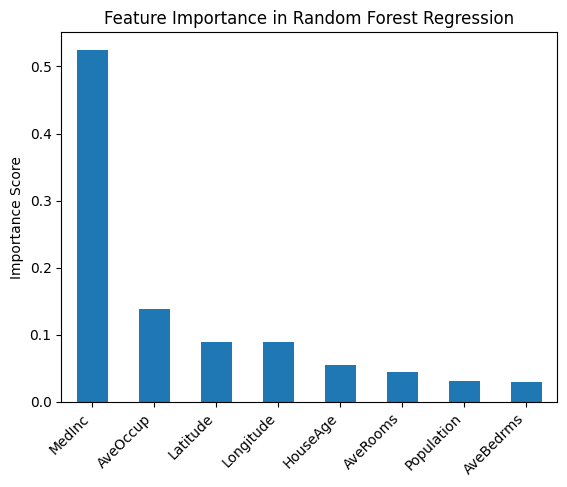

In [8]:
# Extract feature importance
importances = rf.feature_importances_
feature_names = X.columns

# Create DataFrame
feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)

# Plot
plt.figure()
feat_imp.plot(kind='bar')
plt.title("Feature Importance in Random Forest Regression")
plt.ylabel("Importance Score")
plt.xticks(rotation=45, ha='right')
plt.show()


## Conclusion

In this project, Random Forest Regression was successfully applied to predict median house prices in California.

Key takeaways:
- The model captured complex, non-linear relationships
- Performance metrics indicated strong predictive capability
- Median income and geographic features played a major role in price prediction

Random Forest Regression proved to be a robust and interpretable approach for this real-world regression problem.
